In [1]:
import pandas
from sklearn.linear_model import LinearRegression
import statistics
import numpy as np
import matplotlib.pyplot as plt

df=pandas.read_csv("BankChurners.csv",  delimiter=",")
print(df)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

In [2]:
#заміна str на num
for i in df.columns:
    set().add(type(df[i][0]))
print(set(),"\n")

categorical=['Attrition_Flag','Gender','Marital_Status']
for j in df.columns:
    if type(df[j][0])==str:
        print(j,type(df[j][0]))
        if j in categorical:
            q=list(dict(df[j].value_counts()).keys())
        else:
            q=[['Uneducated','High School', 'College','Graduate','Post-Graduate','Doctorate'],
              ['Less than $40K', '$40K - $60K','$60K - $80K', '$80K - $120K', '$120K +'],
              ['Blue', 'Silver', 'Gold', 'Platinum']]\
            [["Education_Level","Income_Category","Card_Category"].index(j)]
        for i in range (len(df[j])):
            if df[j][i]=="Unknown":
                df.at[i,j]=None
                set().add(j)
            else:
                df.at[i,j]=q.index(df[j][i])
        print(df[j])
        

for k in df.columns:
    set().add(type(df[k][0]))
print(set(),"\n")


print(df.isna().sum().sum())

set() 

Attrition_Flag <class 'str'>
0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: object
Gender <class 'str'>
0        1
1        0
2        1
3        0
4        1
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Gender, Length: 10127, dtype: object
Education_Level <class 'str'>
0           1
1           3
2           3
3           1
4           0
         ... 
10122       3
10123    None
10124       1
10125       3
10126       3
Name: Education_Level, Length: 10127, dtype: object
Marital_Status <class 'str'>
0           0
1           1
2           0
3        None
4           0
         ... 
10122       1
10123       3
10124       0
10125    None
10126       0
Name: Marital_Status, Length: 10127, dtype: object
Income_Category <class 'str'>
0        2
1        0
2        3
3        0
4        2
        ..
10122    1
10123    1
10124    0
10125  

In [3]:
# нормалізуємо дані
numerical=['Customer_Age','Months_on_book','Credit_Limit',
                'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct',
                'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
for row in numerical:
    df=df.astype({row:float})
    min_df=min(df[row])
    max_df=max(df[row])
    for i in range(len(df["CLIENTNUM"])):
        df.at[i,row]=(df[row][i]-min_df)/(max_df-min_df)
print(df)

       CLIENTNUM Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383              0      0.404255      1                3   
1      818770008              0      0.489362      0                5   
2      713982108              0      0.531915      1                3   
3      769911858              0      0.297872      0                4   
4      709106358              0      0.297872      1                3   
...          ...            ...           ...    ...              ...   
10122  772366833              0      0.510638      1                2   
10123  710638233              1      0.319149      1                2   
10124  716506083              1      0.382979      0                1   
10125  717406983              1      0.085106      1                2   
10126  714337233              1      0.361702      0                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0                   1              0               2 

In [4]:
# викиди
for i in set():
    l=LinearRegression()
    a=list(df.columns).index(i)
    list(range(2,len(df.columns))).remove(a)
    x=df.dropna().iloc[:,list(range(2,len(df.columns)))]
    y=df.dropna().iloc[:,[a]]
    l.fit(x,y)
    
    for col in df.iloc[:,list(range(2,len(df.columns)))].columns:
        m=statistics.median([x for x in df.iloc[:,list(range(2,len(df.columns)))][col] if x!=None])
        q=len(df.iloc[:,list(range(2,len(df.columns)))][col])
        for i in range (q):
            if df.iloc[:,list(range(2,len(df.columns)))][col][i]==None:
                df.iloc[:,list(range(2,len(df.columns)))][i,col]=int(m)
            
    pred=l.predict(df.iloc[:,list(range(2,len(df.columns)))])
    for j in range(len(pred)):
        if df[i][l]==None:
            df.at[j,i]=abs(round(pred[j][0]))


Customer_Age (10127, 23) -> (10127, 23)


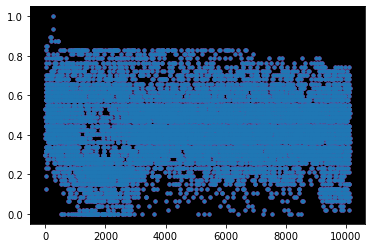

Months_on_book (10127, 23) -> (10127, 23)


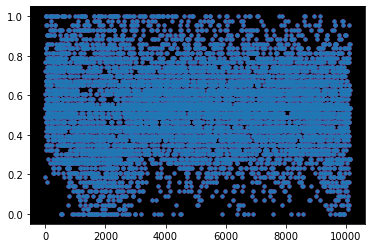

Credit_Limit (10127, 23) -> (10127, 23)


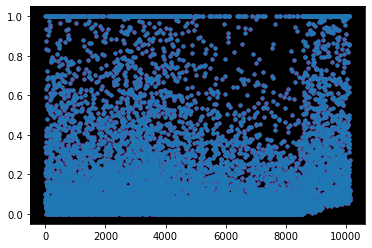

Total_Revolving_Bal (10127, 23) -> (10127, 23)


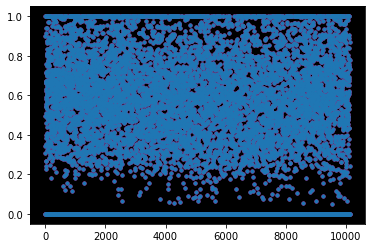

Avg_Open_To_Buy (10127, 23) -> (10127, 23)


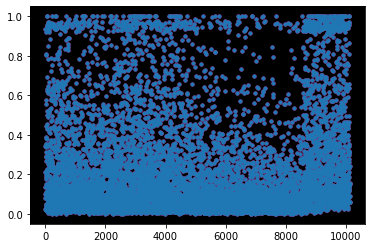

Total_Amt_Chng_Q4_Q1 (10127, 23) -> (10125, 23)


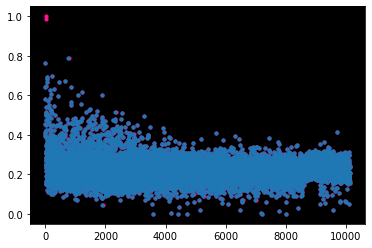

Total_Trans_Amt (10127, 23) -> (10127, 23)


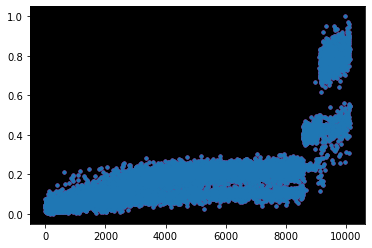

Total_Trans_Ct (10127, 23) -> (10127, 23)


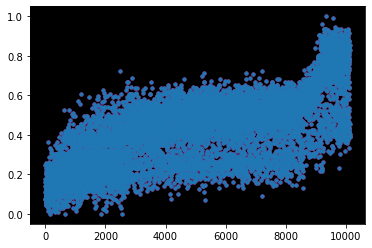

Total_Ct_Chng_Q4_Q1 (10127, 23) -> (10120, 23)


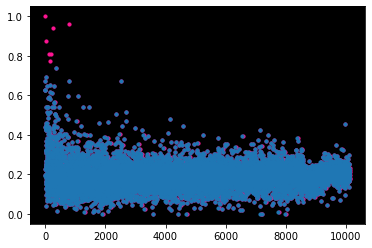

Avg_Utilization_Ratio (10127, 23) -> (10127, 23)


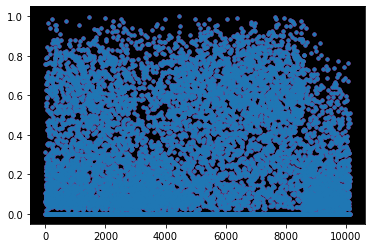

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 (10127, 23) -> (10127, 23)


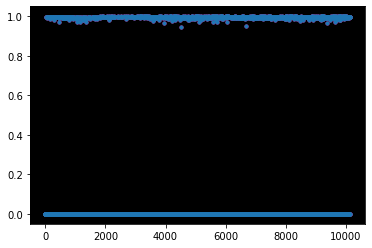

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 (10127, 23) -> (10127, 23)


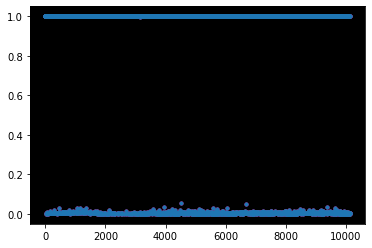

In [5]:

k=dict()
for i in numerical:
    k[i]=3
['Customer_Age','Months_on_book','Credit_Limit',
                'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', 
                 'Total_Trans_Amt','Total_Trans_Ct',
                'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
for i in ['Customer_Age','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1',
          'Total_Trans_Amt','Total_Trans_Ct']:
    k[i]=9

for i in list(numerical):
    if i in k.keys():
        fd=df[np.abs(df[i]-df[i].mean())<=(k[i]*df[i].std())]
        print(i,df.shape," : ",df.shape)       
        fig, ax = plt.subplots()
        ax.scatter(range(len(df[i])),df[i],s=10,c = 'deeppink')   
        ax.scatter(range(len(fd[i])),fd[i],s=10)
        ax.set_facecolor('black')    
        plt.show()

In [6]:
df.to_csv("BankChurners_2.csv")